Fault Data Statistics:
                Time            Ipv            Vpv            Vdc  \
count  129013.000000  129013.000000  129013.000000  129013.000000   
mean        6.450030       1.409844     101.846286     143.612655   
std         3.723929       0.077454       0.311627       1.397005   
min         0.000059       0.690613      98.223877     126.855469   
25%         3.225055       1.358521     101.702881     143.261719   
50%         6.450035       1.410553     101.843262     143.554688   
75%         9.675015       1.457855     101.995850     144.433594   
max        12.899980       1.977234     104.632568     152.636719   

                  ia             ib             ic             va  \
count  129013.000000  129013.000000  129013.000000  129013.000000   
mean        0.011275       0.102903      -0.108396       0.777071   
std         0.368913       0.319970       0.349836     109.764893   
min        -0.752809      -0.557251      -1.033086    -160.516968   
25%       

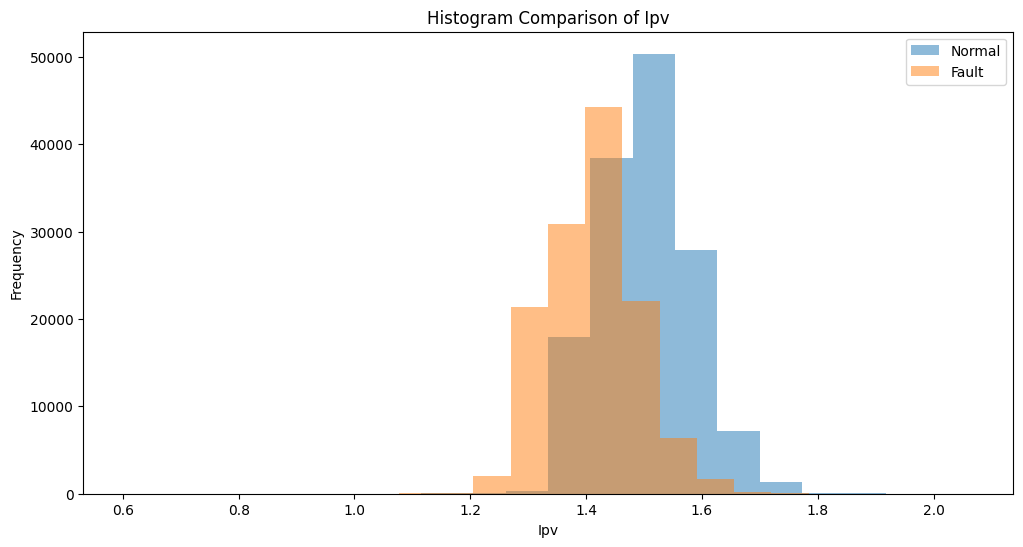

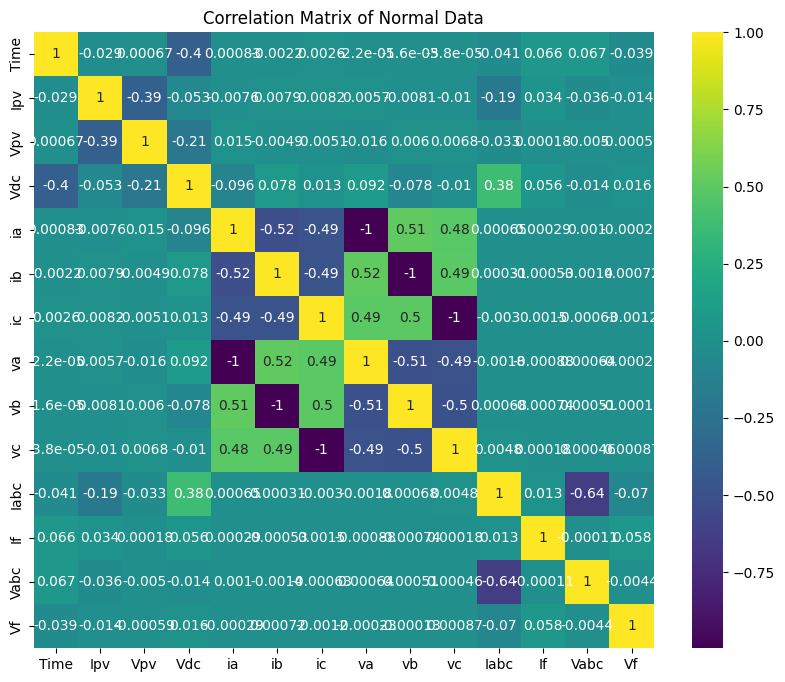


T-test for Ipv:
T-statistic: 310.76196270787796
P-value: 0.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the data
normal_data = pd.read_csv('F0L.csv')
fault_data = pd.read_csv('F1L.csv')

# Part 1: Basic Statistics
# Calculate basic statistics for fault and normal data
fault_stats = fault_data.describe()
normal_stats = normal_data.describe()

# Compare means
fault_mean = fault_data.mean()
normal_mean = normal_data.mean()
difference_in_means = fault_mean - normal_mean

# Compare standard deviations
fault_std = fault_data.std()
normal_std = normal_data.std()

# Print the results
print("Fault Data Statistics:")
print(fault_stats)
print("\nNormal Data Statistics:")
print(normal_stats)
print("\nDifference in Means:")
print(difference_in_means)

# Part 2: Exploratory Data Analysis (EDA)
# Visualization of a specific column (e.g., 'Ipv')
plt.figure(figsize=(12, 6))
plt.hist(normal_data['Ipv'], label='Normal', alpha=0.5, bins=20)
plt.hist(fault_data['Ipv'], label='Fault', alpha=0.5, bins=20)
plt.legend()
plt.title('Histogram Comparison of Ipv')
plt.xlabel('Ipv')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix for normal data
plt.figure(figsize=(10, 8))
correlation_matrix = normal_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Normal Data')
plt.show()

# Part 3: Statistical Tests
# Perform a t-test for 'Ipv' between normal and fault conditions
t_statistic, p_value = stats.ttest_ind(normal_data['Ipv'], fault_data['Ipv'], equal_var=False)
print("\nT-test for Ipv:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data
normal_data = pd.read_csv('F0L.csv')
fault_data = pd.read_csv('F1L.csv')

# Add a 'label' column: 0 for normal, 1 for fault
normal_data['label'] = 0
fault_data['label'] = 1

# Combine the two datasets
data = pd.concat([normal_data, fault_data], ignore_index=True)

# Split into features (X) and target (y)
X = data.drop('label', axis=1)  # Features (all columns except 'label')
y = data['label']  # Target (the 'label' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (standardize features by removing the mean and scaling to unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier with more iterations
model = LogisticRegression(max_iter=5000)  # Increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9779085542477909


Summary of the Process:


1.Load and Label the Data: We started by reading the normal and fault data from CSV files and labeling them as 0 for normal and 1 for fault.
2.Combine Datasets: We combined the normal and fault datasets into one, creating a single dataset to work with.
3.Define Features and Labels: We defined the feature set (X) and the target labels (y).
4.Split Data: We split the data into training and test sets to train the model on one part and evaluate it on another.
5.Scale the Data: Standardization helped ensure that the algorithm converged properly.
6.Train the Model: We used Logistic Regression to train a model that predicts normal or fault conditions.
7.Predict and Evaluate: We made predictions on the test set and calculated the accuracy, which turned out to be 94.86%.
